# <center> NOTAS TFM </center>

In [1]:
#Para texto matematico
from IPython.display import Math
from IPython.display import Latex

In [2]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

## 1. Trayectoria

- Ecuacones de helice

\begin{eqnarray}
x=x_0 + \frac{p_{T}}{kqB}sin(\frac{kqB}{\gamma m}t -\varphi) + sin(\varphi))\\
y=y_0 + \frac{p_{T}}{kqB}(cos(\frac{kqB}{\gamma m}t -\varphi) - cos(\varphi))\\
z=z_0 + \frac{p_{T}sinh(\eta)}{\gamma m} t 
\end{eqnarray}

- Expresar en terminos de los parametros POCA
- Cuando se cumpla la condición $\vec{p} \cdot \vec{r} = 0$
- Lo que lleva a:

\begin{equation}
    t_{POCA} = \frac{\gamma m}{kqB} (\varphi + arctg(\frac{x_0 + \frac{p_{T}}{kqB}sin(\varphi)}{y_0 - \frac{p_{T}}{kqB}cos(\varphi)}))
\end{equation}

- Reemplazando en las ecuaciones anteriores se obtiene el punto POCA (x,y,z)

### Codigo Track class

In [3]:
class Track():
    def __init__(self,phi=np.pi/2,eta=1.5,q=-1,pt=50,pz=20,x0=1,y0=1,z0=0):
        """
        Definir constantes y variables
        La entrada son los parametros de la helice
        """
        self.phi = phi #initial phase
        self.eta = eta #pseudorapidity
        self.k=0.29979 #GeV/(cTm)
        self.q=q #negative or positive factor of e
        self.pt=pt #GeV/c
        self.pz=pz #GeV/c
        self.m=0.106 #GeV/c**2
        self.beta= np.sqrt(self.pt**2 + self.pz**2)/np.sqrt(self.pt**2 + self.pz**2 + self.m**2)
        self.gamma=1/(np.sqrt(1-self.beta**2))
        self.B=3.88 #T
        self.r=self.pt/(self.k*self.q*self.B)
        self.w=self.k*self.q*self.B/(self.gamma*self.m)
        self.x0=x0
        self.y0=y0
        self.z0=z0

    def poca_points(self):
        """
        Punto de aproximación más cercano
        """
        
        den=(self.y0 - (self.r)*(np.cos(self.phi)))
        if den == 0:
            print("no solution")

        num=(self.x0 + (self.r)*(np.sin(self.phi)))
        #Tiempo
        t_poca=(self.phi + np.arctan2(num,den)) / self.w
        
        #Posicion
        x_poca=self.x0+(self.r)*(np.sin(self.w*t_poca-self.phi)+np.sin(self.phi))
        y_poca=self.y0+(self.r)*(np.cos(self.w*t_poca-self.phi)-np.cos(self.phi))
        z_poca=self.z0+(self.pt/(self.gamma*self.m))*np.sinh(self.eta)*t_poca
        
        #Momentum
        px=self.pt*np.cos(self.w*t_poca-self.phi)
        py=-self.pt*np.sin(self.w*t_poca-self.phi)
        
        #Angulo
        phi_poca= np.arctan2(py, px)

        return (x_poca,y_poca,z_poca,phi_poca,t_poca)
    
    def eq_motion(self,t,poca_flag=True):
        """
        Puntos de la trayectoria de la partícula cargada en un campo magnético
        En función del tiempo, t puede ser un escalar o un array
        La variable booleana permite escoger la parametrizacion
        """
        if poca_flag:
            #Ecuaciones con el punto de aproximación más cercano
            xp,yp,zp,phi_poca,t_poca=self.poca_points()
            
            tm=np.linspace(t_poca,t[-1],t.size)
            
            x=xp+(self.r)*(np.sin(self.w*(tm-t_poca)-phi_poca)+np.sin(phi_poca))
            y=yp+(self.r)*(np.cos(self.w*(tm-t_poca)-phi_poca)-np.cos(phi_poca))
            z=zp+(self.pt/(self.gamma*self.m))*np.sinh(self.eta)*(tm-t_poca)
            return (x,y,z)

        if not poca_flag:
            #Ecuaciones originales
            x=self.x0 + self.r * (np.sin(self.w*t - self.phi) + np.sin(self.phi))
            y=self.y0 + self.r * (np.cos(self.w*t - self.phi) - np.cos(self.phi))
            z=self.z0 + self.pt*np.sinh(self.eta)*t/(self.m * self.gamma)
            return (x,y,z)

    def transverse_plot(self,t,poca_flag=True,lab="track", col="blue"):
        """
            Grafico transversal de la curva
            Plano XY
        """
        x,y,z=self.eq_motion(t,poca_flag)
        plt.plot(x,y,label=lab, color=col)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Transverse plane')
        plt.legend()
        #plt.show()
    
    def zy_plot(self,t,poca_flag=True,lab="track", col="blue"):
        """
            Plano ZY
        """
        x,y,z=self.eq_motion(t,poca_flag)
        plt.plot(z,y,label=lab, color=col)
        plt.xlabel('z')
        plt.ylabel('y')
        plt.legend()
        plt.title('Z-Y plane')
        #plt.show()
    
    def plot3d(self,t,poca_flag=True):
        """
            Grafico 3D de la curva
            En función del tiempo, t puede ser un escalar o un array
            La variable booleana permite escoger la parametrizacion
        """
        if poca_flag:
            xp,yp,zp,phi_poca,t_poca=self.poca_points()
            t=np.linspace(t_poca,10,100)
            x,y,z=self.eq_motion(t,poca_flag=True)
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot(x,y,z, label='parametric curve')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.legend()
            #plt.show()
        if not poca_flag:
            x,y,z=self.eq_motion(t,poca_flag)
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot(x,y,z, label='parametric curve')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.legend()
            #plt.show()

In [4]:
#Pruebas
#Curva
track1=Track(x0=1.5,y0=1,z0=1)

In [5]:
#tiempo
time=np.linspace(0,10,100)

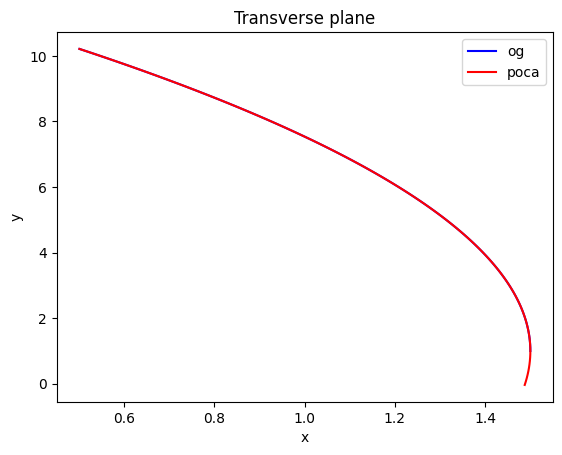

In [6]:
#Plots Transversales
track1.transverse_plot(time,poca_flag=False, lab="og")
track1.transverse_plot(time, lab="poca",col="red")
plt.show()

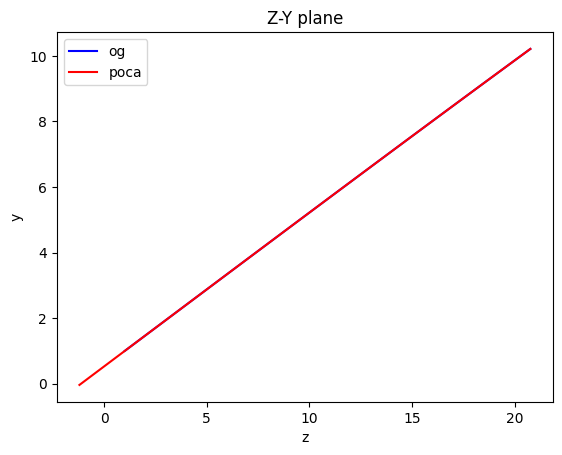

In [7]:
#Plots ZY
track1.zy_plot(time,poca_flag=False, lab="og")
track1.zy_plot(time, lab="poca",col="red")
plt.show()

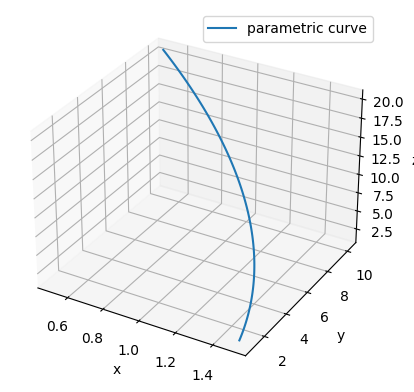

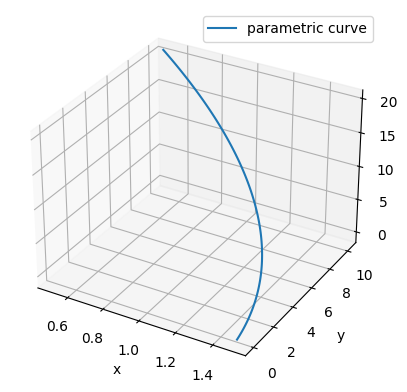

In [8]:
#3D plot
track1.plot3d(time,poca_flag=False)
track1.plot3d(time)

In [9]:
#probar funciones de ecuaciones y plotear en conjunto

#original
x,y,z=track1.eq_motion(time,poca_flag=False)
#Poca param
xp,yp,zp=track1.eq_motion(time)

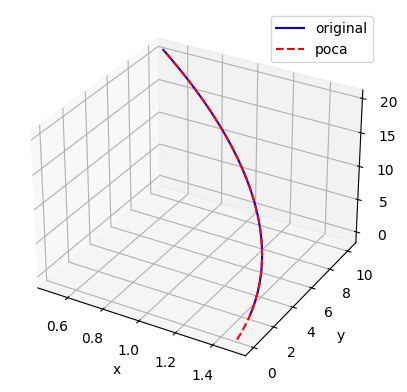

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z, label='original', color="blue")
ax.plot(xp,yp,zp, label="poca", color="red",linestyle="--")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

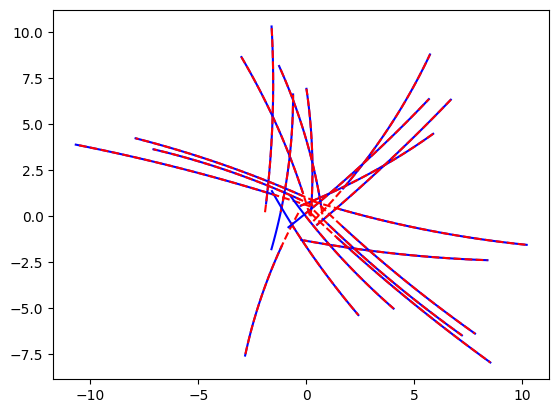

In [11]:
#Probar con diferentes valores
for i in range(20):
    x0=np.random.uniform(-2,2)
    y0=np.random.uniform(-2,2)
    z0=np.random.uniform(-2,2)
    phi=np.random.uniform(-np.pi,np.pi)
    eta=np.random.uniform(-2.4,2.4)
    q=-1
    pt=np.random.uniform(30,100)
    pz=np.random.uniform(20,50)
    
    t=Track(phi,eta,q,pt,pz,x0,y0,z0)
    xo,yo,zo=t.eq_motion(time,poca_flag=False)
    xpo,ypo,zpo=t.eq_motion(time)
    
    plt.plot(xo,yo,color="blue")
    plt.plot(xpo,ypo,color="red", linestyle="--")

plt.show()

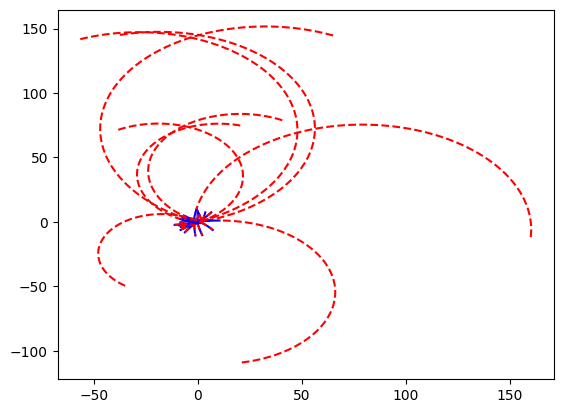

In [12]:
#Probar con diferentes valores
#Si q=1 cambia todo

for i in range(20):
    x0=np.random.uniform(-2,2)
    y0=np.random.uniform(-2,2)
    z0=np.random.uniform(-2,2)
    phi=np.random.uniform(-np.pi,np.pi)
    eta=np.random.uniform(-2.4,2.4)
    q=np.random.choice([1,-1])
    pt=np.random.uniform(30,100)
    pz=np.random.uniform(20,50)
    
    t=Track(phi,eta,q,pt,pz,x0,y0,z0)
    xo,yo,zo=t.eq_motion(time,poca_flag=False)
    xpo,ypo,zpo=t.eq_motion(time)
    
    plt.plot(xo,yo,color="blue")
    plt.plot(xpo,ypo,color="red", linestyle="--")

plt.show()

## 2. Detector

- Poligonos de n lados en el plano transversal

- Ecuacion de un plano
\begin{equation}
    ax+by+cz+d=0
\end{equation}

- Dados tres puntos, se puede calcular la ecuacion como:

<center>p1=(x1,y1,z1), p2=(x2,y2,z2), p3=(x3,y3,z3)</center>
- Se forman dos vectores &emsp; &emsp; 

<center>$\vec{p2-p1}$ y $\vec{p3-p1}$</center>
- El resultado del producto vectorial correspondera a los parametros del plano

<center>$\vec{p2-p1} \times \vec{p3-p1}= (a,b,c)$</center>
- d se encuentra reemplazando algun punto p1,p2 ó p3 

<center>$d=-(ap1_{x} + bp1_{y} + cp1_{z})$</center>

## Codigo Tracker class

In [13]:
class Tracker():
    def __init__(self, sides, radi):
        """
            La entrada es el numero de lados
            Y el radio de una circunferencia circunscrita en el poligono
        """
        self.sides = sides
        self.radi = radi

    def polygon_points(self):
        """
            Generar puntos del poligono
            Array
        """
        theta = np.linspace(0, 2*np.pi, self.sides+1)
        x = self.radi*np.cos(theta)
        y = self.radi*np.sin(theta)
        return (np.round(x,3),np.round(y,3))

    def line(self,x1,y1,x2,y2):
        """
            Calcular parametros de una recta
            Pendiente y ordenada
            Dados dos puntos
        """
        #slope
        if x2-x1 == 0:
            m=0
        else:
            m=(y2-y1)/(x2-x1)
        #y-intercept
        b=y1-m*x1
        return (np.round(m,3),np.round(b,3))

    def plot_line(self,x1,y1,x2,y2):
        """
            Graficar una recta dados dos puntos
        """
        a,b=self.line(x1,y1,x2,y2)
        if x2-x1 == 0:
            plt.plot(x1*np.ones(100),np.linspace(y1,y2,100),color="black")
        else:
            t=np.linspace(x1,x2,50)
            f=a*t+b
            plt.plot(t,f,color='black')

    def plot_polygon(self):
        """
            Graficar el poligono
        """
        x,y=self.polygon_points()
        for i in range(self.sides):
            self.plot_line(x[i],y[i],x[i+1],y[i+1])
    
    def plane(self,x1,y1,x2,y2):
        """
            Ecuacion del plano
        """
        #vector normal
        c=np.cross(np.array([x2-x1,y2-y1,2]),np.array([0,0,2]))
        #constante
        k=(c[0]*x1+c[1]*y1+c[2]*1)*-1
        return (c,k)
    
    def plane_points(self):
        """
            Ecuacion de los planos
            ax+by+cz+k=0
            c[0]*x+c[1]*y+c[2]*z+c[3]=0
        """
        x,y=self.polygon_points()
        plane=[]
        for i in range(self.sides):
            p1=np.array([x[i],y[i],1])
            p2=np.array([x[i+1],y[i+1],3])
            p3=np.array([x[i],y[i],3])
            #vector normal
            c=np.cross(p2-p1,p3-p1)
            #constante
            k=(c[0]*p1[0]+c[1]*p1[1]+c[2]*p1[2])*-1
            c=np.append(c,k)
            plane.append(c)
        return plane

    def plot_plane(self):
        """
            Graficar los planos
        """
        x,y=self.polygon_points()
        plane=self.plane_points()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i in range(self.sides):
            xs=np.linspace(-25,25,100)
            zs=np.linspace(-25,25,100)
            X, Z = np.meshgrid(xs, zs)
            Y = (plane[i][3] - plane[i][0]*X)/plane[i][1]
            ax.plot_surface(X, Y, Z, color='blue')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
        plt.show()

    def inter(self,x,y):
        """
            Prueba interseccion de un punto con el poligono
        """
        
        #Puntos del poligono
        px,py=self.polygon_points()

        cx=[]
        cy=[]
        #Ubicar x
        for i in range(self.sides):
            if (px[i]<=x and px[i+1]>=x) or (px[i]>=x and px[i+1]<=x):
                cx.append(i)
        #Ubicar y
        for i in range(self.sides):
            if (py[i]<=y and py[i+1]>=y) or (py[i]>=y and py[i+1]<=y):
                cy.append(i)
        c=-1
        if cx and cy:
            for i in cx:
                for j in cy:
                    if i==j:
                        c=i
                        break
        if c>=0:
            plan,k=self.plane(px[c],py[c],px[c+1],py[c+1])
            if int(plan[0]*x+plan[1]*y+plan[2]*1+k)==0:
                return (x,y)

    def Kal_init(self):
        """
            Inicializar Kalman
        """
        x0=np.array([x[0],y[0],z[0],0,0,0])
        P0=np.eye(6)
        Q=np.eye(6)
        R=np.eye(3)
        A=np.array([[1,0,0,1,0,0],
                    [0,1,0,0,1,0],
                    [0,0,1,0,0,1],
                    [0,0,0,1,0,0],
                    [0,0,0,0,1,0],
                    [0,0,0,0,0,1]])
        H=np.array([[1,0,0,0,0,0],
                    [0,1,0,0,0,0],
                    [0,0,1,0,0,0]])
        return (x0,P0,Q,R,A,H)

    def Kal_filter(self,x0,P0,Q,R,A,H,x,y,z):
        """
            Filtro de Kalman
        """
        x_hat=x0
        P=P0

        x_hat_minus=A@x_hat
        P_minus=A@P@A.T + Q
        K=P_minus@ H.T @ np.linalg.inv(H@P_minus@H.T + R)
        x_hat=x_hat_minus + K@(np.array([x,y,z]) - H@x_hat_minus)
        P=(np.eye(6) - K@H)@P_minus

        return x_hat

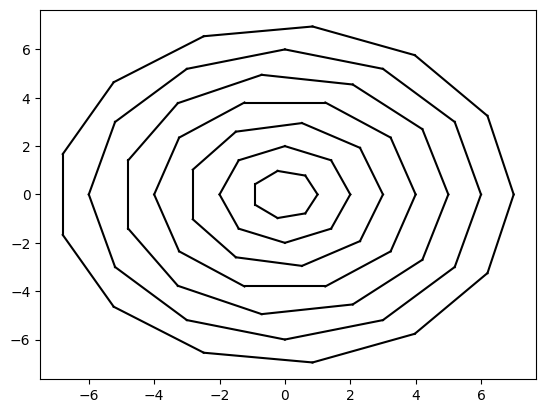

In [14]:
for i in range(7):
    det=Tracker(7+i,1+i)
    det.plot_polygon()

In [15]:
#Puntos de poligono
det=Tracker(12,2)
det.plane_points()

[array([ 2.   ,  0.536, -0.   , -4.   ]),
 array([ 1.464   ,  1.464   , -0.      , -3.999648]),
 array([ 0.536,  2.   , -0.   , -4.   ]),
 array([-0.536,  2.   ,  0.   , -4.   ]),
 array([-1.464   ,  1.464   ,  0.      , -3.999648]),
 array([-2.   ,  0.536,  0.   , -4.   ]),
 array([-2.   , -0.536,  0.   , -4.   ]),
 array([-1.464   , -1.464   ,  0.      , -3.999648]),
 array([-0.536, -2.   ,  0.   , -4.   ]),
 array([ 0.536, -2.   ,  0.   , -4.   ]),
 array([ 1.464   , -1.464   ,  0.      , -3.999648]),
 array([ 2.   , -0.536,  0.   , -4.   ])]

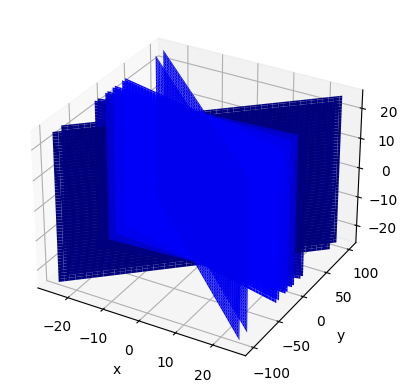

In [16]:
det.plot_plane()

### Interseccion

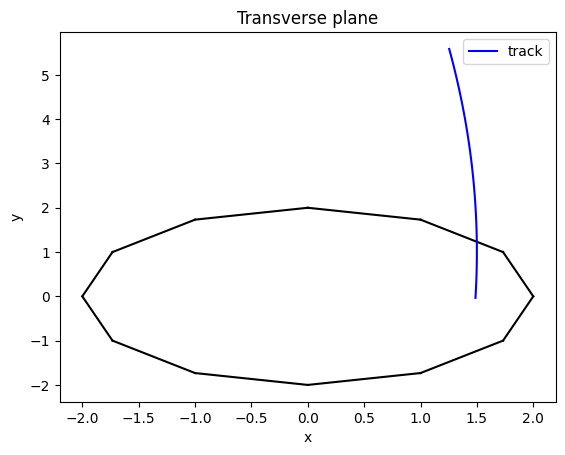

In [17]:
det.plot_polygon()
track1.transverse_plot(time[:50])

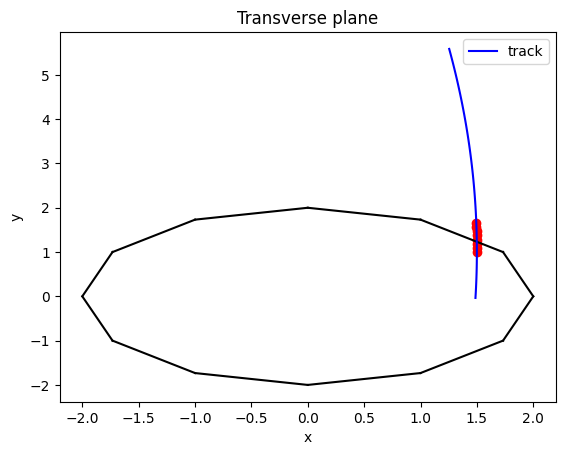

In [18]:
for i in range(x.size):
    if det.inter(x[i],y[i])!=None:
        x0,y0=det.inter(x[i],y[i])
        plt.scatter(x0,y0,color="red")
det.plot_polygon()
track1.transverse_plot(time[:50])

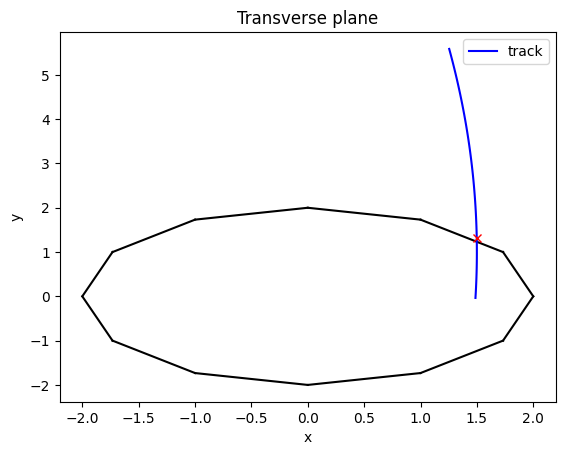

In [19]:
l=[[],[]]
for i in range(x.size):
    if det.inter(x[i],y[i])!=None:
        x0,y0=det.inter(x[i],y[i])
        l[0].append(x0)
        l[1].append(y0)
        
det.plot_polygon()
track1.transverse_plot(time[:50])
plt.plot(np.mean(np.array(l[0])),np.mean(np.array(l[1])),"rx")

/home/ccc/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ccc/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


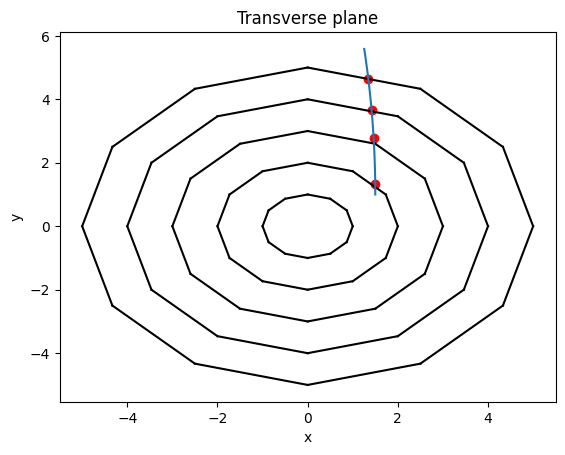

In [20]:
n=5
t,l=[],[]
for i in range(n):
    t.append(Tracker(12,1+i))
    l.append([[],[],[]])


for i in range(x.size):
    #Bucle sobre los poligonos  
    for j in range(len(t)):
        if t[j].inter(x[i],y[i])!=None:
            x0,y0=t[j].inter(x[i],y[i])
            l[j][0].append(x0)
            l[j][1].append(y0)
            l[j][2].append(z[i])


a,b,c=[],[],[]
for i in range(len(l)):
    a.append(np.mean(np.array(l[i][0])))
    b.append(np.mean(np.array(l[i][1])))
    c.append(np.mean(np.array(l[i][2])))


for i in range(len(a)):
    plt.scatter(a[i],b[i],color="red")

for i in range(len(t)):
    t[i].plot_polygon()

plt.plot(x[:50],y[:50])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transverse plane')
plt.show()

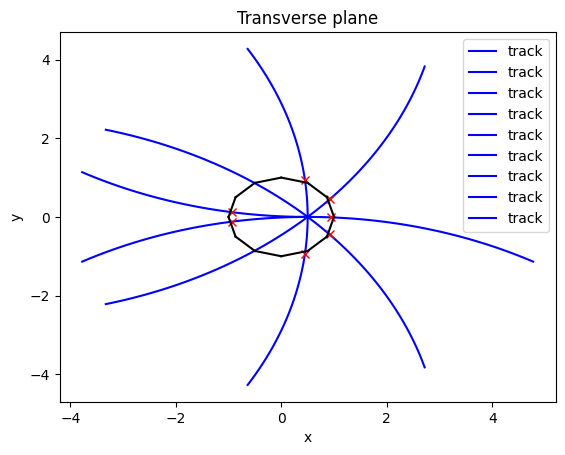

In [21]:
t1=Tracker(12,1)

theta=np.linspace(-np.pi,np.pi,9)

for i in theta:
    x0=0.5
    y0=0
    z0=0
    phi=i
    eta=2
    q=np.random.choice([-1,1])
    pt=10
    pz=20

    t=Track(phi,eta,q,pt,pz,x0,y0,z0)
    t.transverse_plot(time,poca_flag=False)
    x,y,z=t.eq_motion(time,poca_flag=False)

    #Intersection
    l=[[],[]]
    for j in range(x.size):
        if t1.inter(x[j],y[j])!=None:
            x0,y0=t1.inter(x[j],y[j])
            l[0].append(x0)
            l[1].append(y0)
    plt.plot(np.mean(np.array(l[0])),np.mean(np.array(l[1])),"rx")

t1.plot_polygon()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transverse plane')
plt.show()

## Otra interseccion

- Todos los planos tienen la caracteristica de c=0
- Lleva a una ecuación $ax + by +k =0$
- Recordando que:
    - $x=x_0 + r [sen(wt-\varphi)+sen(\varphi)]$
    - $y=y_0 + r [cos(wt-\varphi)-cos(\varphi)]$

- Reemplazando en la ecuacion del plano, se reduce a:
<center>$\alpha sen(wt-\varphi) + \beta cos(wt-\varphi)+\kappa=0$</center>
- Donde
    - $\alpha = ar$
    - $\beta = br$
    - $\kappa = a x_0 + b y_0 +k + arsen(\varphi) - brcos(\varphi)$

Ahora,
- La ecuacion 

    <center>$asenx + bcosx = c$</center> 
- Tiene solución 

    <center>$x = 2n\pi + \phi - \psi$</center>
- Si se cumple que 
    <center>$c^2 \leq a^2 + b^2$</center>
<br><center>$\psi \in (\frac{-\pi}{2}, \frac{-\pi}{2})$ ---> $tan\psi = \frac{b}{a}$</center>
<br><center>$\phi: sen\phi = \frac{c}{a} cos \psi$</center>

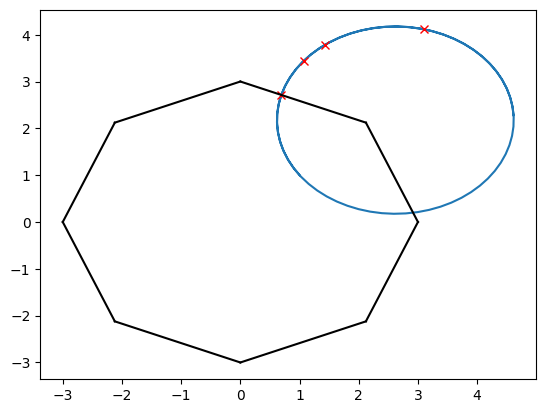

In [22]:
#Parametros [a.b.c.d]
trac=Tracker(8,3)
plane=trac.plane_points()

#Trayectoria de prueba
x0=1
y0=1
r=2
phi=np.pi*0.7

def eq(t):
    x=x0+r*(np.sin(t-phi) + np.sin(phi))
    y=y0+r*(np.cos(t-phi) - np.cos(phi))
    return x,y

tm=[]
for i in plane:
    c=(i[0]*x0+i[1]*y0+i[3]+i[0]*r*np.sin(phi)-i[1]*r*np.cos(phi))*-1
    a=i[0]*r
    b=i[1]*r
    #print("Parametros de la ecuacion: ",a,b,c)
    if c**2 <= (a**2+b**2):
        fi=np.arccos(a/np.sqrt(a**2+b**2))
        psi=np.arcsin(np.cos(fi)*c/a)
        tm.append(2*np.pi+psi-fi+phi)
    #psi=c/np.sqrt(a**2+b**2)
    #beta=np.arccos(a/np.sqrt(a**2+b**2))
    #if psi>-1 and psi<1:
    #    tm.append(np.arcsin(psi) + phi - beta)
    #print("tiempo: ", np.arcsin(psi) + phi - beta)



x1,y1=eq(np.array(tm))
x,y=eq(time)

plt.plot(x,y)
plt.plot(x1,y1,"rx")
trac.plot_polygon()
plt.show()

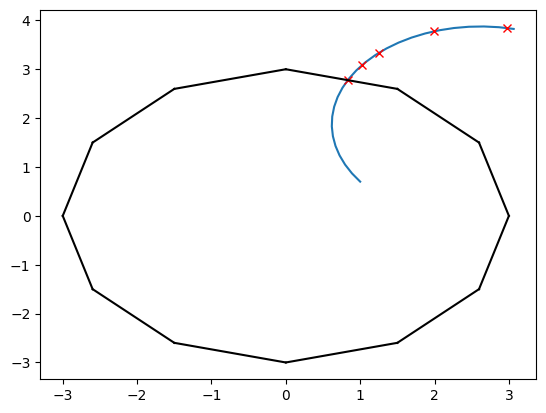

In [37]:
#Parametros [a.b.c.d]
trac=Tracker(12,3)
plane=trac.plane_points()

#Trayectoria de prueba
x0=1
y0=0.7
r=2
phi=np.pi*0.7

def eq(t):
    x=x0+r*(np.sin(t-phi) + np.sin(phi))
    y=y0+r*(np.cos(t-phi) - np.cos(phi))
    return x,y

tm=[]
for i in plane:
    c=(i[0]*x0+i[1]*y0+i[3]+i[0]*r*np.sin(phi)-i[1]*r*np.cos(phi))*-1
    a=i[0]*r
    b=i[1]*r
    #print("Parametros de la ecuacion: ",a,b,c)
    if c**2 <= (a**2+b**2):
        fi=np.arccos(a/np.sqrt(a**2+b**2))
        psi=np.arcsin(np.cos(fi)*c/a)
        tm.append(2*np.pi+psi-fi+phi)
    #psi=c/np.sqrt(a**2+b**2)
    #beta=np.arccos(a/np.sqrt(a**2+b**2))
    #if psi>-1 and psi<1:
    #    tm.append(np.arcsin(psi) + phi - beta)
    #print("tiempo: ", np.arcsin(psi) + phi - beta)



x1,y1=eq(np.array(tm))
x,y=eq(time[:25])

plt.plot(x,y)
plt.plot(x1,y1,"rx")
trac.plot_polygon()
plt.show()